# B1: Introducción al aprendizaje supervisado

## Contexto:

Uno de los problemas más complejos de la actualidad es la autorización de créditos a clientes. Un desafío de interés tanto para las instituciones bancarias como para los negocios que ofrecen planes crediticios, ya que necesitan definir si el cliente cuenta o no con los requisitos para obtener el beneficio.

Esto puede considerarse un problema de clasificación, que se resolverá al generar un modelo que te permita clasificar o predecir si al solicitante se le asigna o no el crédito.

## Aprendizaje Supervisado

Para obtener el modelo de clasificación deseado, utilizaremos la técnica de aprendizaje supervisado, que se basa en un conjunto de entrenamiento compuesto por:

- **Variables de entrada**
- **Variable de salida**

En el caso de las autorizaciones crediticias, se manejan múltiples variables además del monto solicitado.

Usaremos datos del repositorio de la Universidad de California en Irvine (UCI), disponible en [UCI Machine Learning Repository](https://archive.ics.uci.edu/).

Trabajaremos con el conjunto de datos "German Credit Data", que contiene atributos de clientes que solicitan créditos. El objetivo es determinar si un cliente es confiable y si la solicitud de crédito representa un riesgo.


In [4]:
import pandas as pd

germandata = pd.read_csv('GermanCredit.csv')
display(germandata.head())
display(germandata.info())

,AsignarCredito,duracion,historial,proposito,monto,ahorros,edocivil,edad,otroscreditos,casa,otrosplanes,trabajo,carro,extranjero
0,0,18,4,2,1049,1,2,21,3,1,1,3,1,1
1,0,9,4,0,2799,1,3,36,3,1,2,3,1,1
2,0,12,2,9,841,2,2,23,3,1,1,2,1,1
3,0,12,4,0,2122,1,3,39,3,1,2,2,1,2
4,0,12,4,0,2171,1,3,38,1,2,2,2,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AsignarCredito  1000 non-null   int64
 1   duracion        1000 non-null   int64
 2   historial       1000 non-null   int64
 3   proposito       1000 non-null   int64
 4   monto           1000 non-null   int64
 5   ahorros         1000 non-null   int64
 6   edocivil        1000 non-null   int64
 7   edad            1000 non-null   int64
 8   otroscreditos   1000 non-null   int64
 9   casa            1000 non-null   int64
 10  otrosplanes     1000 non-null   int64
 11  trabajo         1000 non-null   int64
 12  carro           1000 non-null   int64
 13  extranjero      1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB


None

**Nota:** Aquí observarás que la variable de salida, `AsignarCredito`, toma los valores de 0 para indicar que esta solicitud de crédito no representa un riesgo y el valor de 1 indicando que sí representa un riesgo. En lo sucesivo se denomina como `Y` a la variable de salida `AsignarCredito`.

Los valores históricos conocidos de 0s y 1s de la variable de salida `AsignarCredito` permiten considerar este problema como un problema de aprendizaje supervisado de clasificación. La finalidad será diseñar y entrenar un modelo de clasificación supervisado que pueda predecir a cuál de las dos clases pertenece cada registro:

- **Clase 1:** Cliente de riesgo (`AsignarCredito` = 1)
- **Clase 0:** Cliente no riesgoso (`AsignarCredito` = 0)

Aunque todas las variables están registradas como numéricas, una inspección revela que varias de ellas son categóricas o cualitativas. A continuación, se presenta la información sobre cada variable:

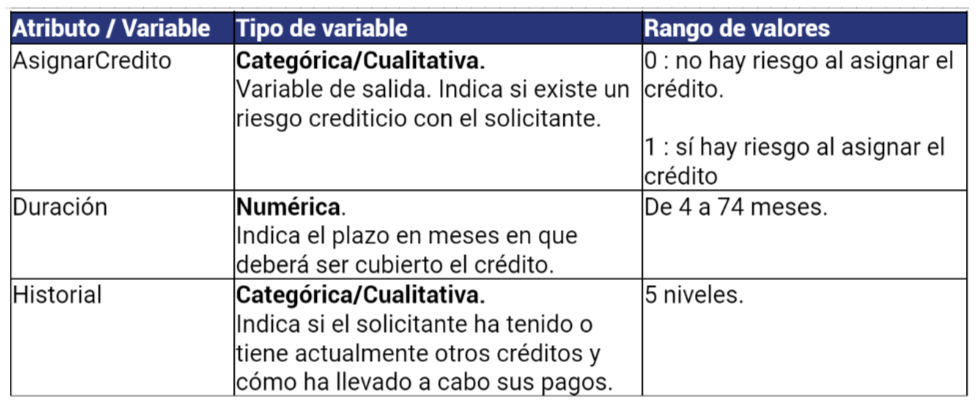
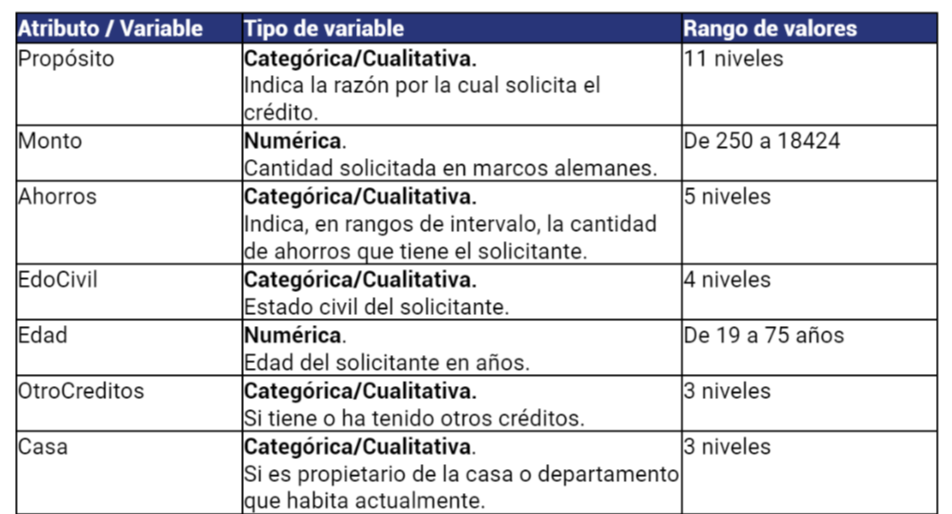
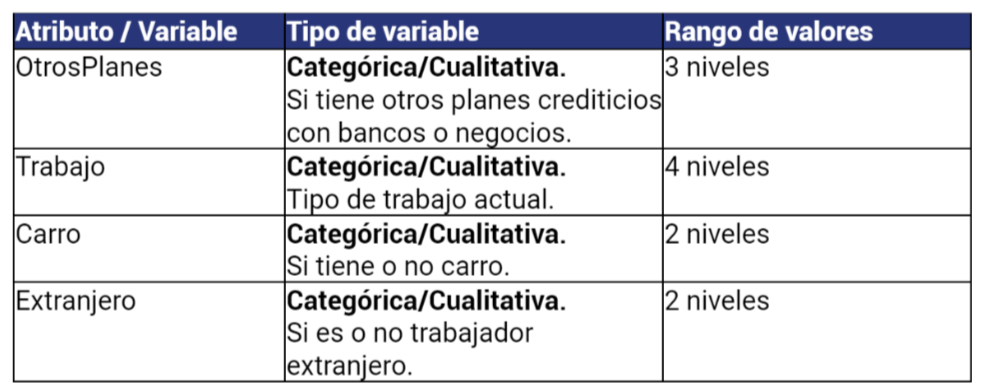

En este caso, las variables categóricas se registraron con valores enteros, por lo que inicialmente se tratarán como numéricas. A partir de los resultados obtenidos, se mejorará el modelo. Dado que los niveles de cada clase son 0 y 1, se puede obtener el total de registros sumando los valores de la columna correspondiente.


In [5]:
sum(germandata['AsignarCredito'])

300

Puedes inferir con la información que te arrojan estos datos, que de los 1,000 registros que tienes, 300 son de la clase de crédito de riesgo y 700 de la clase de crédito no riesgoso.

## El impacto del manejo de las bases de datos

### Extracción de información

Retomemos el ejemplo de la solicitud de crédito, en el que hicimos una inspección general de los datos. Existe gran potencial de información latente en los datos originales. Tu tarea será saber cómo organizarlos para extraer dicha información.

La primera etapa de la técnica del aprendizaje supervisado consiste en identificar los conjuntos de las variables de entrada y la variable de salida.

In [ ]:
X = germandata[['duracion','historial','proposito','monto','ahorros','edocivil','edad',
            'otroscreditos','casa','otrosplanes','trabajo','carro','extranjero']]
Y = germandata['AsignarCredito']

X = X.values
Y = Y.values

print(X)

Para este caso particular usaremos un **70% para el conjunto de entrenamiento, un 15% para el conjunto de validación y el 15% restante para el conjunto de prueba.**
Mediante los comandos de la librería de scikit-learn puedes obtener estos porcentajes como se muestra a continuación:

In [8]:
from sklearn.model_selection import train_test_split

x_train_validation, x_test, y_train_validation, y_test = \
train_test_split(X, Y, test_size=0.15)

x_train, x_validation, y_train, y_validation = \
train_test_split(x_train_validation, y_train_validation, test_size=0.176)

La primera partición genera el conjunto de prueba con un 15% de los datos. Es importante recalcar que este conjunto de prueba **ya no deberá tocarse sino hasta al final, cuando se desee obtener el desempeño final del modelo.** 

Con 850 de los registros restantes generas el conjunto de entrenamiento y validación. En particular, si deseas obtener un conjunto de validación con 150 registros, entonces el valor de porcentaje en la segunda partición debe ser:

$$150/850≈0.176150/850≈0.176$$

> **Recuerda que:** 

1. Los datos del conjunto de entrenamiento se utilizan para obtener los pesos del modelo de clasificación de una manera supervisada.

2. Los datos del conjunto de validación los estarás usando para comprobar qué tan bien se está comportando tu modelo cuando haces modificaciones o ajustes a los hiperparámetros del modelo.

3. Y finalmente el conjunto de prueba lo usarás para obtener el desempeño final del modelo.

Verifica la dimensión de cada uno de los tres conjuntos generados:

In [ ]:
print( "Dimensión X_train_set:\t\t", x_train.shape)
print( "Dimensión X_validation_set:\t", x_validation.shape)
print ("Dimension X_test_set:\t\t", x_test.shape)
print("\nDimensión Y_train:\t\t", y_train.shape)
print ("Dimensión Y_validation:\t\t", y_validation.shape)
print ("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (700, 13)
Dimensión X_validation_set:		 (150, 13)
Dimension X_test_set:		 (150, 13)

Dimensión Y_train:		 (700,)
Dimensión Y_validation:		 (150,)
Dimensión Y_test:		 (150,)


Tu objetivo es predecir si una solicitud de crédito es o no considerada riesgosa. Es decir, te encuentras con un problema de clasificación binaria, donde 0 significa solicitante no riesgoso y 1 significa solicitante riesgoso. 

Aplica uno de los principales modelos en problemas de clasificación binaria, a saber, el modelo de **Regresión Logística.**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, solver="newton-cg", max_iter=1000)
modelo_RL = clf.fit(x_train, y_train)

print(
    "Precisión del modelo de regresión logística: ",
    modelo_RL.score(x_validation, y_validation),
)

### Actividad Adicional

Puedes volver a ejecutar los siguientes pasos:

1. **Partición de datos**: Divide el conjunto en **entrenamiento** y **validación**, manteniendo intacto el conjunto de **prueba**.
2. **Ajuste del modelo**: Entrena el modelo con el conjunto de entrenamiento y ajusta sus hiperparámetros usando el conjunto de validación.
3. **Evaluación de exactitud**: Calcula el porcentaje de exactitud utilizando el conjunto de validación.

Para reducir la variabilidad en los resultados, repite estos pasos **10 veces** y calcula el **promedio** y la **desviación estándar** de la exactitud obtenida en el conjunto de validación.

Recuerda que el conjunto de **prueba** debe permanecer sin modificaciones hasta la evaluación final.

In [ ]:
import numpy as np

exactitud = []

for k in range(1, 10):
    x_train, x_validation, y_train, y_validation = train_test_split(
        x_train_validation, y_train_validation, test_size=0.176
    )

    clf = LogisticRegression(C=1.0, solver="newton-cg", max_iter=5000)
    modelo_RL = clf.fit(x_train, y_train)
    exactitud.append(modelo_RL.score(x_validation, y_validation))

print("Precicion promdio:", np.mean(exactitud))
print("Desviación estandar:", np.std(exactitud))

Para mejorar los resultados, ajusta los siguientes hiperparámetros del modelo de **regresión logística**:

1. **Porcentaje de partición**: Modifica la distribución entre el conjunto de **entrenamiento** y **validación** para evaluar su impacto en la generalización del modelo.
2. **Constante de regularización inversa \( C \)**: Ajusta el valor de **\( C \)** para controlar la penalización aplicada a los coeficientes del modelo.
3. **Solver**: Experimenta con diferentes algoritmos de optimización (`liblinear`, `lbfgs`, `saga`, etc.) para mejorar la convergencia y estabilidad del modelo.
4. **Número máximo de iteraciones**: Aumenta el número de iteraciones si el modelo no converge correctamente.

Consulta la documentación de **scikit-learn** para explorar otros parámetros y mejorar el ajuste del modelo:  
[Regresión Logística en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)